In [1]:
# Change working directory
%cd ..

f:\DS Lab\OT\KPG_GWB


C:\Users\ngtdu\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import pandas as pd
import numpy as np
import scipy
import os
import ot
from optimal_transport.models import KeypointGW
from optimal_transport.experiments import RhoSensitivity, EpsilonSensitivity, BarycenterSensitivity, AlphaSensitivity, TolSensitivity, ItersSensitivity,LearningRateSensitivity
from typing import Tuple, Optional, List, Union, Dict

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

Using TensorFlow backend.


Source:amazon, Target: amazon
Source:amazon, Target: dslr
Threshold reached at iteration 76
Source:amazon, Target: webcam
Source:dslr, Target: amazon
Threshold reached at iteration 79
Source:dslr, Target: dslr
Threshold reached at iteration 19
Source:dslr, Target: webcam
Threshold reached at iteration 17
Source:webcam, Target: amazon
Threshold reached at iteration 22
Source:webcam, Target: dslr
Threshold reached at iteration 22
Source:webcam, Target: webcam
Threshold reached at iteration 40
[0% guiding] Accuracy: 0.700358422939068, Runtime: 174.04981899261475
Source:amazon, Target: amazon
Source:amazon, Target: dslr
Threshold reached at iteration 65
Source:amazon, Target: webcam
Source:dslr, Target: amazon
Threshold reached at iteration 19
Source:dslr, Target: dslr
Threshold reached at iteration 23
Source:dslr, Target: webcam
Threshold reached at iteration 20
Source:webcam, Target: amazon
Threshold reached at iteration 32
Source:webcam, Target: dslr
Threshold reached at iteration 21
So

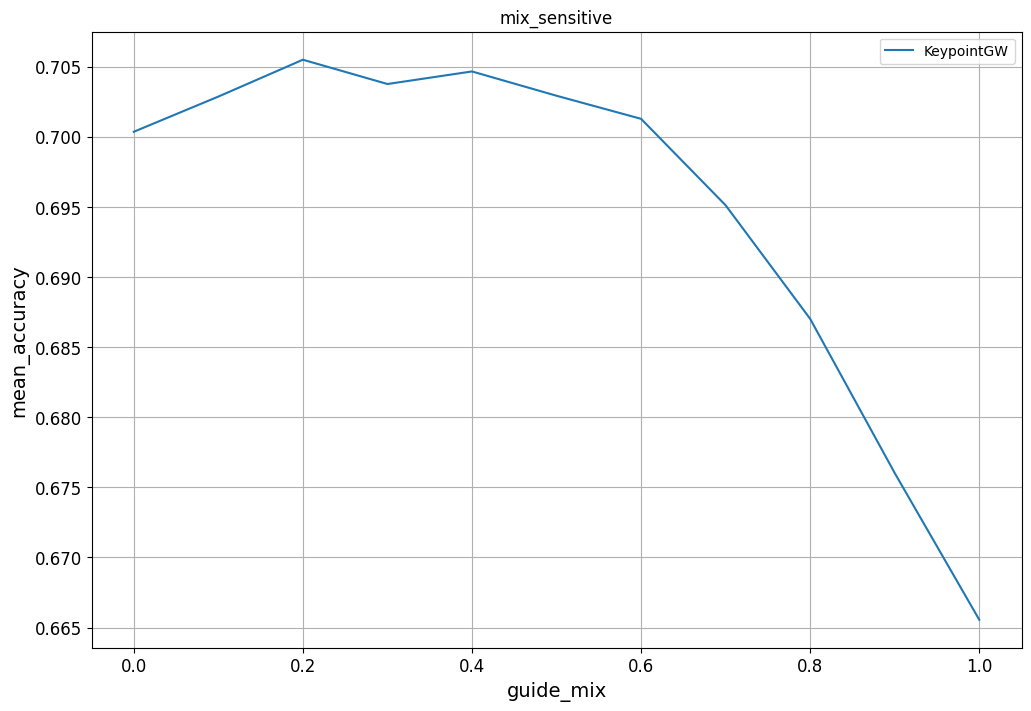

In [3]:
#@title Alpha sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = AlphaSensitivity(model=model, log_dir="logs")
results = experiment(
    min_alpha=0, max_alpha=1, freq_alpha=0.1,
)

[1 times] Accuracy: 0.6942652329749105, Runtime: 386.78056716918945
[2 times] Accuracy: 0.6942652329749105, Runtime: 290.8450961112976
[3 times] Accuracy: 0.6942652329749104, Runtime: 275.7997946739197
[4 times] Accuracy: 0.6942652329749105, Runtime: 276.87134170532227
[5 times] Accuracy: 0.6942652329749105, Runtime: 273.39554738998413
[6 times] Accuracy: 0.6942652329749106, Runtime: 275.61752438545227
[7 times] Accuracy: 0.6942652329749106, Runtime: 286.4189476966858
[8 times] Accuracy: 0.6942652329749106, Runtime: 284.0388081073761
[9 times] Accuracy: 0.6942652329749106, Runtime: 286.3158881664276
[10 times] Accuracy: 0.6942652329749106, Runtime: 280.5593852996826


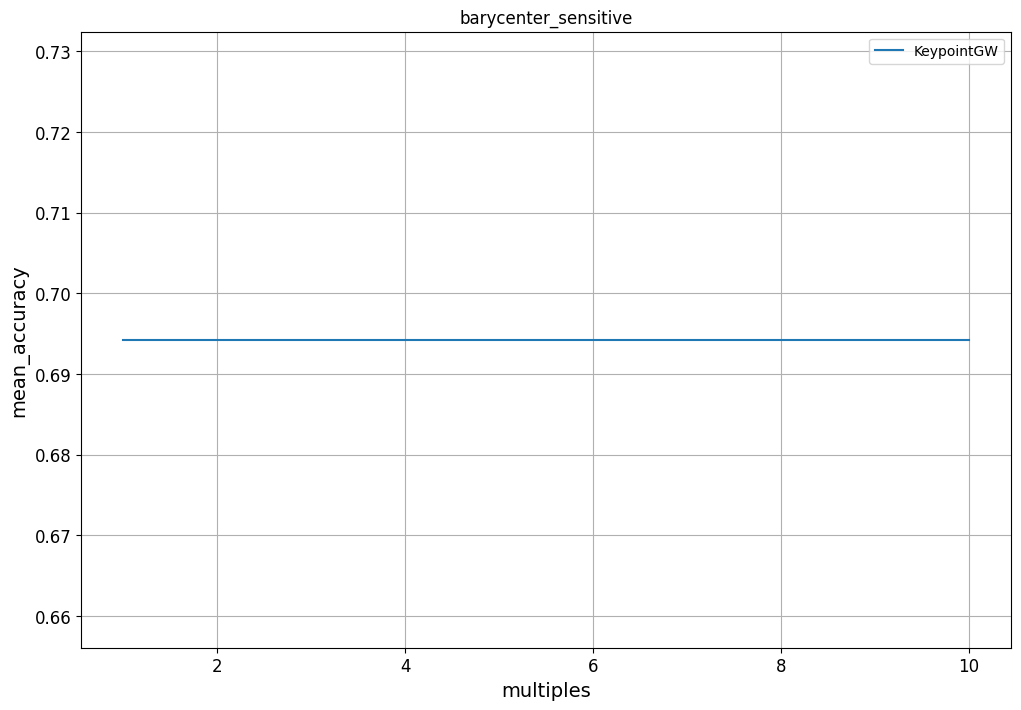

In [3]:
#@title Keypoint sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = BarycenterSensitivity(model=model, log_dir="logs")
results = experiment(
    min_barycenter=n_keypoints, max_barycenter=n_keypoints*10, num_classes=n_keypoints
)

[0.0001 entropy] Accuracy: 0.6942652329749105, Runtime: 288.21962237358093
[0.0005 entropy] Accuracy: 0.6942652329749105, Runtime: 241.7721290588379
[0.001 entropy] Accuracy: 0.6942652329749104, Runtime: 225.91634345054626
[0.005 entropy] Accuracy: 0.6942652329749105, Runtime: 217.14741349220276
[0.01 entropy] Accuracy: 0.6942652329749105, Runtime: 240.30935096740723
[0.05 entropy] Accuracy: 0.6942652329749106, Runtime: 282.10278964042664
[0.1 entropy] Accuracy: 0.6942652329749106, Runtime: 279.87092566490173
[0.5 entropy] Accuracy: 0.6942652329749106, Runtime: 272.79609870910645
[1 entropy] Accuracy: 0.6942652329749106, Runtime: 259.0623540878296


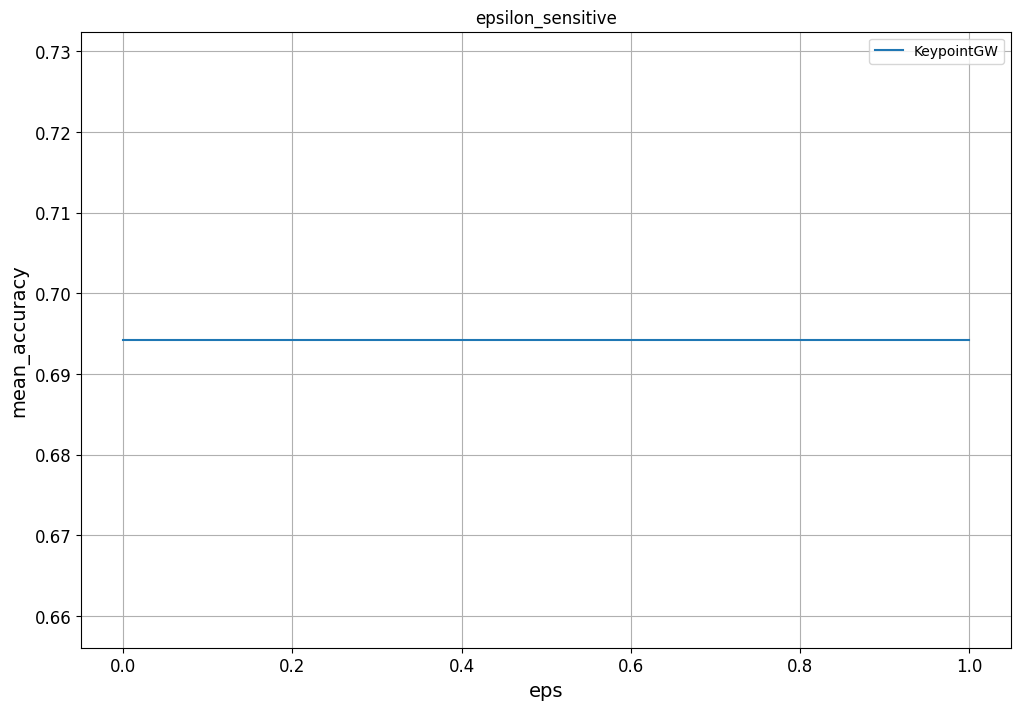

In [3]:
#@title Eps sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = EpsilonSensitivity(model=model, log_dir="logs")
results = experiment(
    eps_range=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
)

[0.05 temperature] Accuracy: 0.7530465949820789, Runtime: 672.9494781494141
[0.07 temperature] Accuracy: 0.7530465949820788, Runtime: 802.7992146015167
[0.09 temperature] Accuracy: 0.7530465949820788, Runtime: 7281.442246675491
[0.1 temperature] Accuracy: 0.7530465949820787, Runtime: 995.8156540393829
[0.2 temperature] Accuracy: 0.7530465949820788, Runtime: 999.9553456306458
[0.3 temperature] Accuracy: 0.7530465949820788, Runtime: 993.1122133731842
[0.4 temperature] Accuracy: 0.7530465949820789, Runtime: 876.877605676651
[0.5 temperature] Accuracy: 0.7530465949820789, Runtime: 986.7317461967468


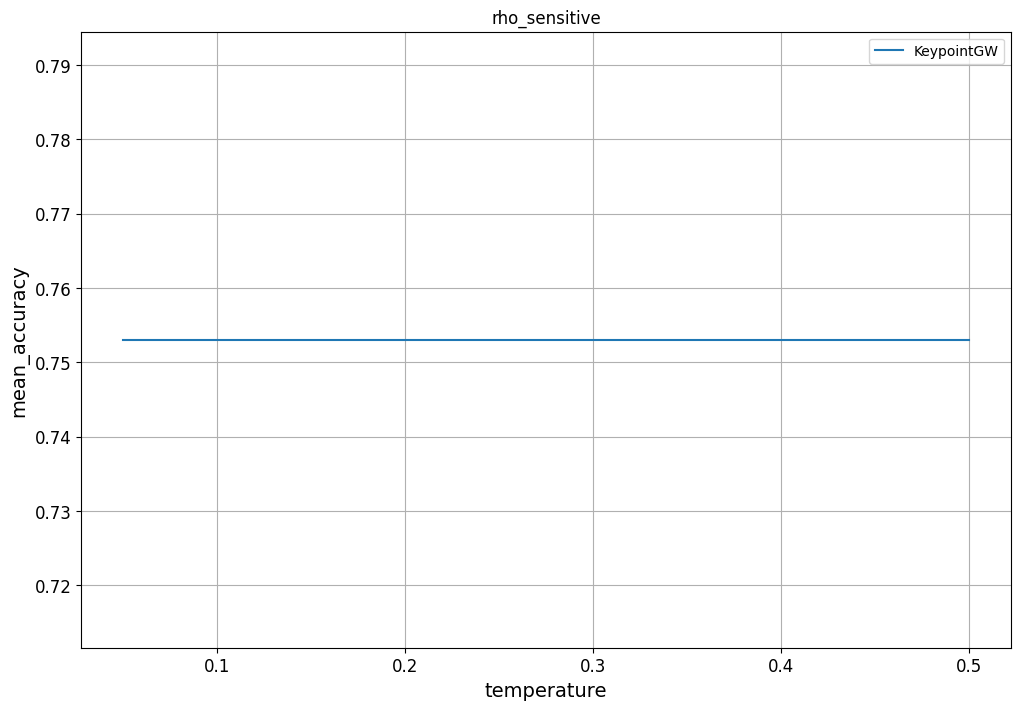

In [4]:
#@title Rho sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = RhoSensitivity(model=model, log_dir="logs")
results = experiment(
    rho_range=[0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]
)

[5 iters] Accuracy: 0.6720430107526882, Runtime: 287.4836165904999
[10 iters] Accuracy: 0.7003584229390681, Runtime: 189.11759543418884
[50 iters] Accuracy: 0.717921146953405, Runtime: 381.3246555328369
[100 iters] Accuracy: 0.7267025089605733, Runtime: 716.0471527576447
[200 iters] Accuracy: 0.7318996415770608, Runtime: 1231.3870878219604
[500 iters] Accuracy: 0.7354838709677419, Runtime: 3048.973752260208
[1000 iters] Accuracy: 0.7379928315412188, Runtime: 6125.084144830704
[2000 iters] Accuracy: 0.7398745519713263, Runtime: 13602.195073127747


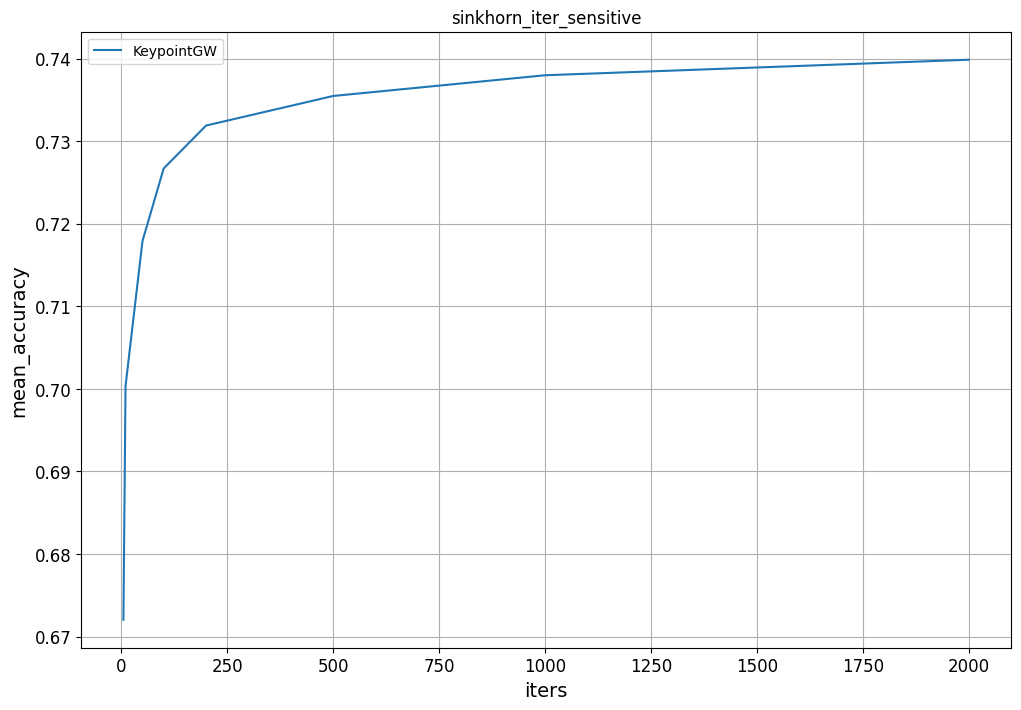

In [4]:
#@title Iters sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = ItersSensitivity(model=model, log_dir="logs")
results = experiment(
    iters_range = [5, 10, 50, 100, 200, 500, 1000, 2000]
)

[1e-10 stop_thr] Accuracy: 0.7530465949820789, Runtime: 2124.0407149791718
[1e-09 stop_thr] Accuracy: 0.7530465949820788, Runtime: 1223.0170862674713
[1e-08 stop_thr] Accuracy: 0.7530465949820788, Runtime: 1205.1138336658478
[1e-07 stop_thr] Accuracy: 0.7530465949820787, Runtime: 1171.7503926753998
[1e-06 stop_thr] Accuracy: 0.7530465949820788, Runtime: 1126.405505657196
[1e-05 stop_thr] Accuracy: 0.7530465949820788, Runtime: 1021.1169741153717
[1.5e-05 stop_thr] Accuracy: 0.7530465949820789, Runtime: 992.5910224914551
[0.0001 stop_thr] Accuracy: 0.7530465949820789, Runtime: 821.2298741340637
[0.001 stop_thr] Accuracy: 0.7530465949820789, Runtime: 563.9576287269592
[0.01 stop_thr] Accuracy: 0.7529749103942653, Runtime: 295.0944182872772


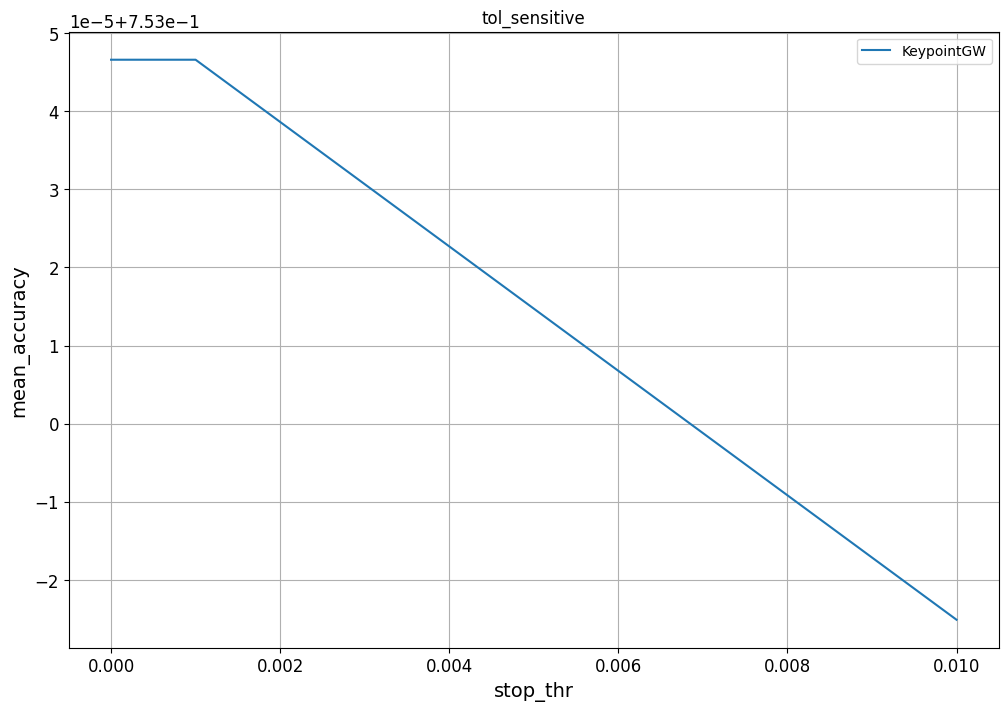

In [3]:
#@title Stop_thr sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = TolSensitivity(model=model, log_dir="logs")
results = experiment(
    tol_range = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1.5e-5, 1e-4, 1e-3, 1e-2]
)

[0.0001 learning_rate] Accuracy: 0.7530465949820789, Runtime: 904.8406364917755
[0.005 learning_rate] Accuracy: 0.7530465949820788, Runtime: 1033.896419763565
[0.001 learning_rate] Accuracy: 0.7530465949820788, Runtime: 895.9618916511536
[0.005 learning_rate] Accuracy: 0.7530465949820787, Runtime: 941.0683991909027
[0.01 learning_rate] Accuracy: 0.7530465949820788, Runtime: 930.7819521427155
[0.05 learning_rate] Accuracy: 0.7530465949820788, Runtime: 3086.516320705414
[0.1 learning_rate] Accuracy: 0.7530465949820789, Runtime: 2161.4099571704865


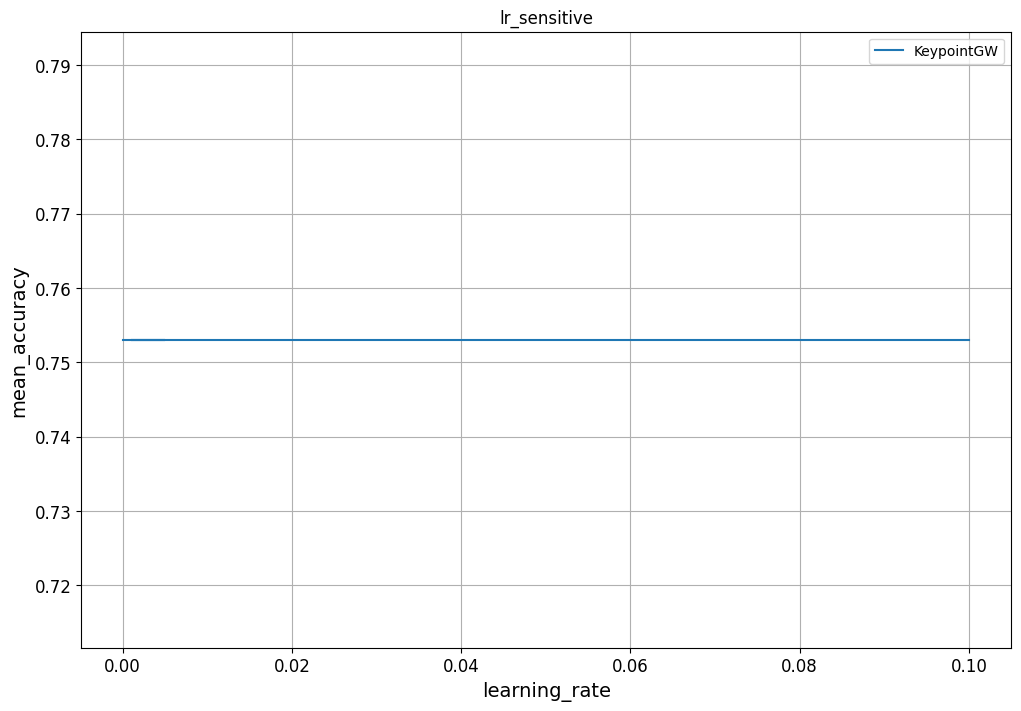

In [3]:
#@title Learning_rate sensitivity
n_keypoints = 31
model = {
    "KeypointGW": KeypointGW(loss_fun='square_loss', num_free_barycenters=n_keypoints, n_clusters=n_keypoints, alpha=0.5, tol = 1e-5, max_iters=100),
}
experiment = LearningRateSensitivity(model=model, log_dir="logs")
results = experiment(
    lr_range = [0.0001, 0.005, 0.001, 0.005, 0.01, 0.05, 0.1]
)